<a href="https://colab.research.google.com/github/dl-ub-summer-school/2021/blob/main/Seminar_3_Linear_regression_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning UB 2021 
## Семинар 3 -- Шугаман регрессийг машин сургалтын аргаар бодъё.


# Өмнөх дугаарт ....

## Багштай сургалт (supervised learning)-н ерөнхий дүр зураг


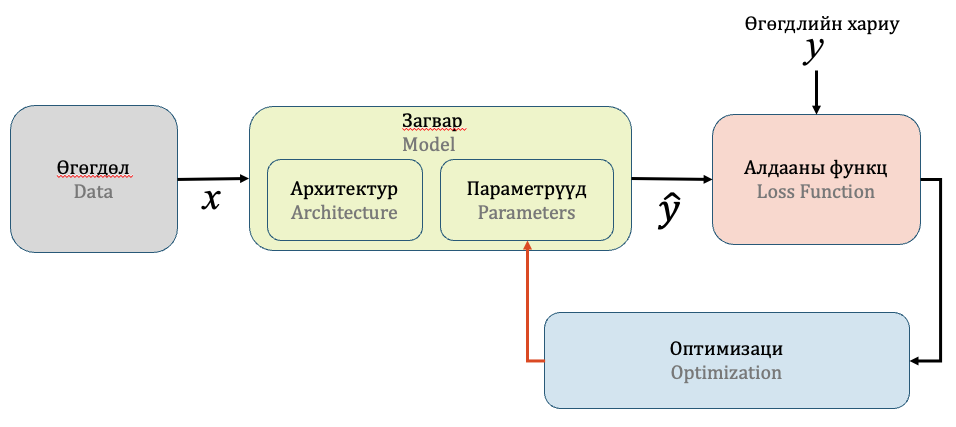


## Өнөөдөр, дээрх зурагийн дагуу, доорх *загвар - алдааны функц -- оптимизацийн алгоритм* гуравыг ажиллуулж үзнэ. 
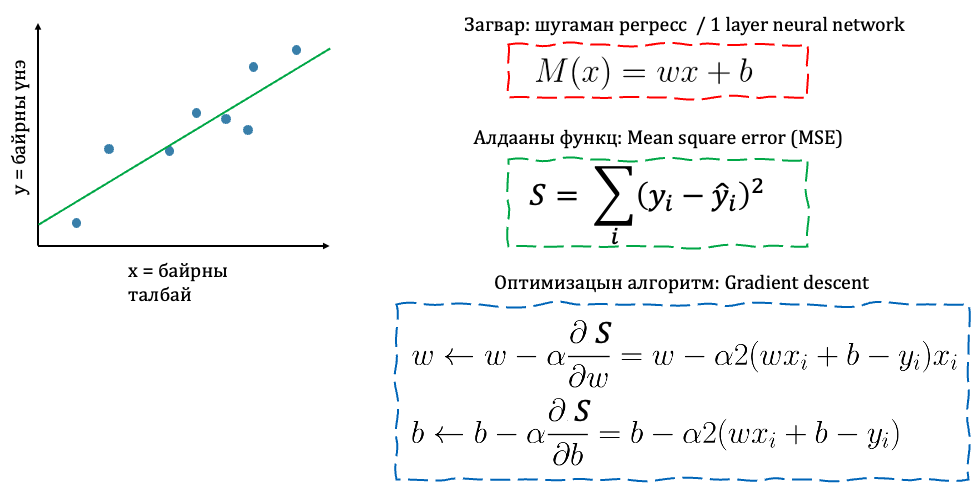

## Neural network дүрслэл


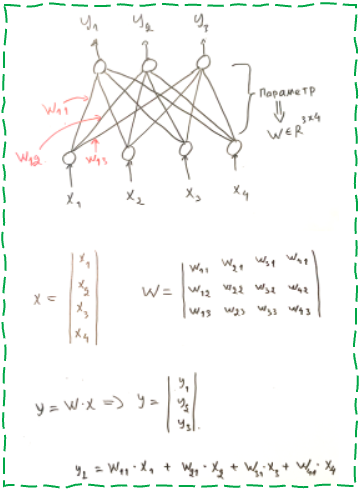

## Нэг зүйл, олон талаас харж болно. 


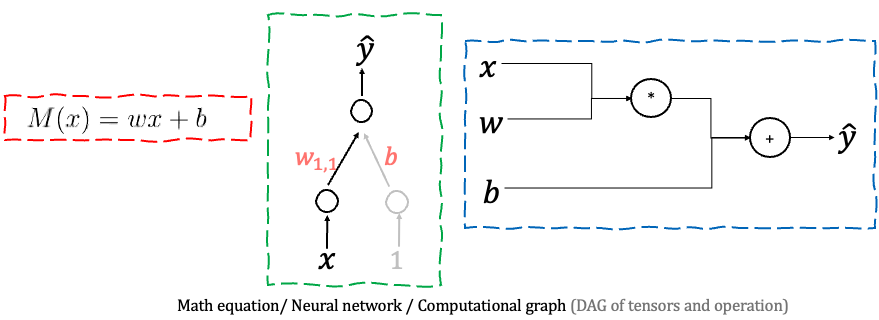

### Шугаман давхарга / Linear layer

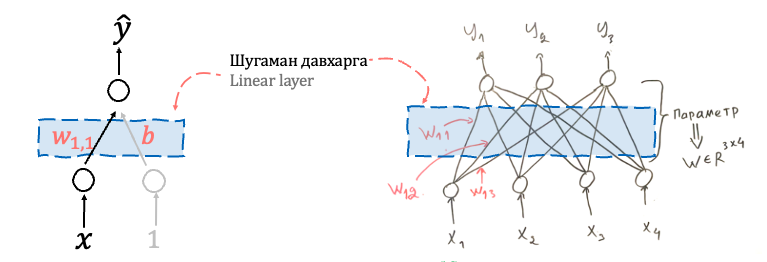

## Computational graph 

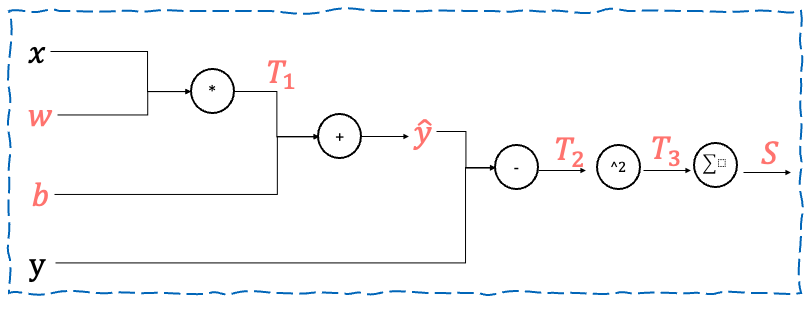


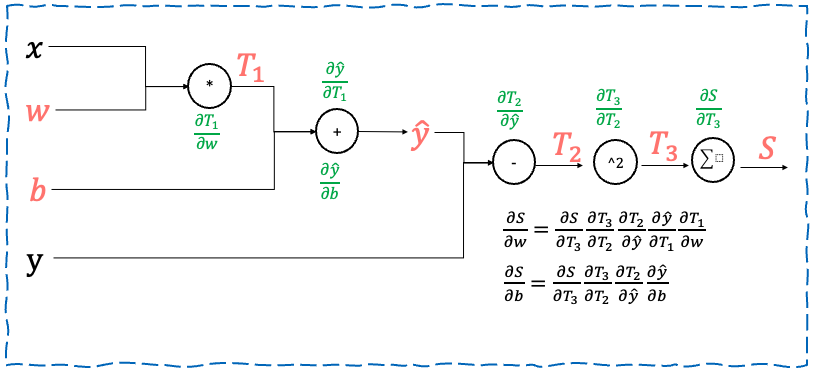

---
---
# За жинxнээсээ семинараа эхлэе! 



In [1]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

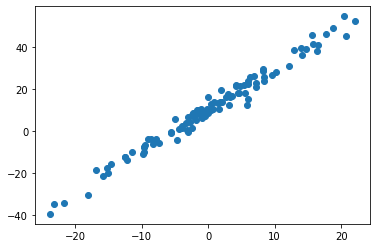

In [2]:
X = torch.randn(100, 1)*10
y = 2 * X + 3 * torch.randn(100, 1) + 10 
plt.plot(X.numpy(), y.numpy(), 'o')

In [14]:
class LinearRegress(nn.Module):
  def __init__(self):
    super().__init__()
    # self.w = torch.randn(1, 1, requires_grad=True)
    # self.b = torch.randn(1, 1, requires_grad=True)
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred 
  
  def get_loss(self, y_pred, y):
    S = (y_pred - y).pow(2).sum() / len(y_pred)
    return S
    
  def get_params(self):
    [w, b] = model.parameters()
    return w.item(), b.item()

  def plot_model(self, x, y):
    w, b = self.get_params()
    plt.scatter(x, y)
    x_1 = np.array([-30,30])
    y_1 = w*x_1 + b
    plt.plot(x_1, y_1, 'r')
    plt.show()    

In [15]:
# # Загварынхаа instance-г үүсгэе
model = LinearRegress()
model

[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.6521]], requires_grad=True) Parameter containing:
tensor([0.0290], requires_grad=True)


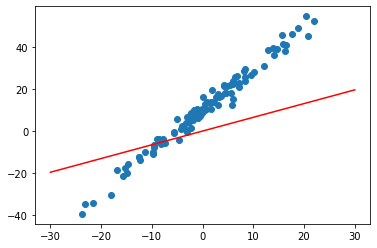

In [16]:
model.plot_model(X, y)

In [13]:
y_pred = model.forward(X)
print(X[:5])
print(y_pred[:5])

tensor([[ -0.1772],
        [  1.8984],
        [-18.0531],
        [ -8.2107],
        [  1.4513]])
tensor([[ 0.6712],
        [ 0.8353],
        [-0.7421],
        [ 0.0361],
        [ 0.8000]], grad_fn=<SliceBackward>)


0 280.9335021972656


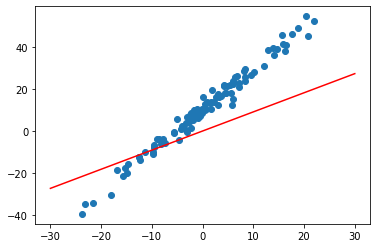

100 77.78813934326172


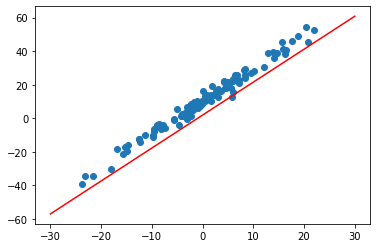

200 54.599281311035156


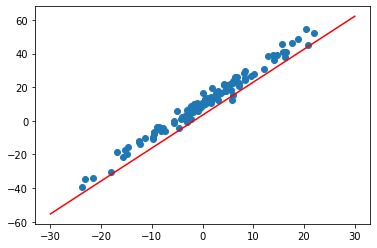

300 39.05769348144531


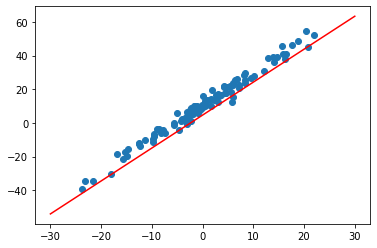

400 28.641443252563477


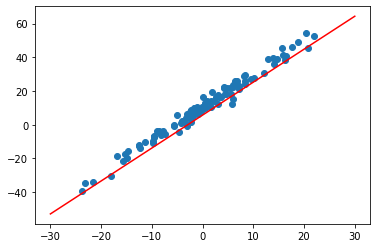

500 21.6602725982666


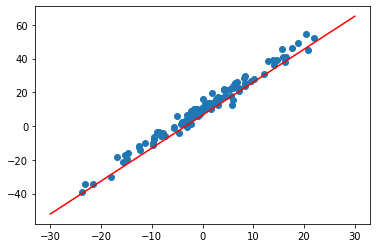

600 16.981338500976562


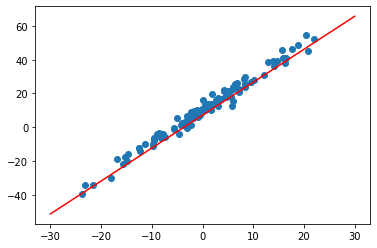

700 13.845449447631836


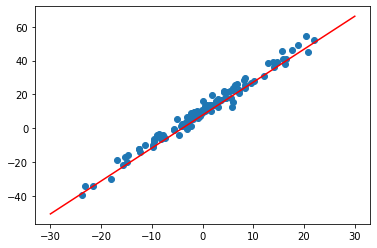

800 11.743697166442871


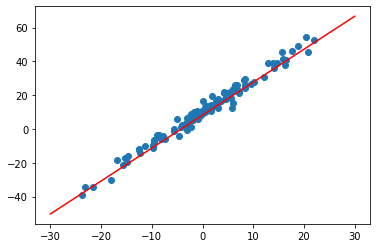

900 10.335068702697754


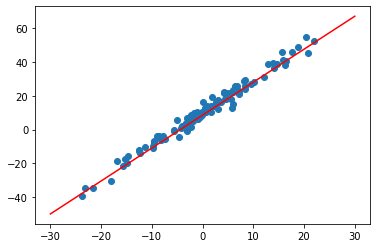

In [17]:
# Загвараа сургая

optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
epoch = 1000
losses = list()

for i in range(epoch):

  y_pred = model.forward(X)
  S = model.get_loss(y_pred, y)
  optimizer.zero_grad()
  S.backward()
  optimizer.step()

  losses.append(S.item())

  if i % 100 == 0:
    print(i, S.item())
    model.plot_model(X, y)

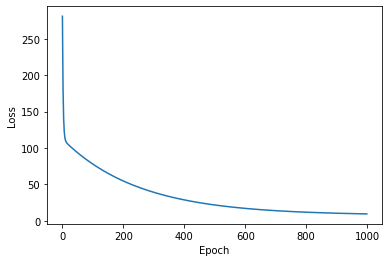

In [18]:
model.get_params()
# Алдаа (loss)-аа зурж үзье. 
plt.plot(range(epoch), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()